**VISU 2 - Sysarmy**

In [1]:
!pip install pandas==1.4.2
!pip install numpy==1.22.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.4.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 23.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


In [2]:
import pandas as pd
import numpy as np

In [3]:
# Change the file directory to yours, the files are in a public folder in google drive:
# https://drive.google.com/drive/folders/1CsvJs0xZ9SCLtG4ci2dNGCkhqnI-1DLS?usp=drive_link
df_lengs = pd.read_csv('/content/drive/MyDrive/2022/Orga_de_Datos/Datasets/sysarmy_remuneracion_salarial_argentina.csv', usecols=['Lenguajes de programación o tecnologías.'])

In [4]:
df_lengs.dropna(inplace=True)

In [5]:
df_lengs.columns = ['lenguajes_de_programacion']

In [6]:
df_lengs = df_lengs[df_lengs['lenguajes_de_programacion'] != 'Ninguno de los anteriores']

In [7]:
df_lengs.reset_index(drop=True, inplace=True)

In [8]:
df_lengs['lenguajes_de_programacion'] = df_lengs.apply(lambda row : row['lenguajes_de_programacion'].split(", "), axis=1) #Convierto las categorias a listas

In [9]:
exploded_df = df_lengs.explode('lenguajes_de_programacion') #Creo una fila por cada categoría distinta

In [10]:
most_common = set(exploded_df.value_counts('lenguajes_de_programacion').head(5).index)

In [11]:
df_heatmap = pd.DataFrame(columns=most_common)

def count_others(x):
  lenguajes = {}
  for lenguaje in x:
    if lenguaje in most_common:
      lenguajes[lenguaje] = 1
  return lenguajes

for row in df_lengs.index:
  df_heatmap = df_heatmap.append(count_others(df_lengs.iloc[row]['lenguajes_de_programacion']), ignore_index = True)

Streaming output truncated to the last 5000 lines.
<ipython-input-11-bb58506fbfc6>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_heatmap = df_heatmap.append(count_others(df_lengs.iloc[row]['lenguajes_de_programacion']), ignore_index = True)
<ipython-input-11-bb58506fbfc6>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_heatmap = df_heatmap.append(count_others(df_lengs.iloc[row]['lenguajes_de_programacion']), ignore_index = True)
<ipython-input-11-bb58506fbfc6>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_heatmap = df_heatmap.append(count_others(df_lengs.iloc[row]['lenguajes_de_programacion']), ignore_index = True)
<ipython-input-11-bb58506fbfc6>:11: FutureWarning: The frame.append method is deprecated an

In [12]:
df_heatmap = df_heatmap.fillna(0)

In [13]:
df_graph = df_heatmap.corr()

In [14]:
!pip install matplotlib==3.5.2
!pip install seaborn==0.11.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 29.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


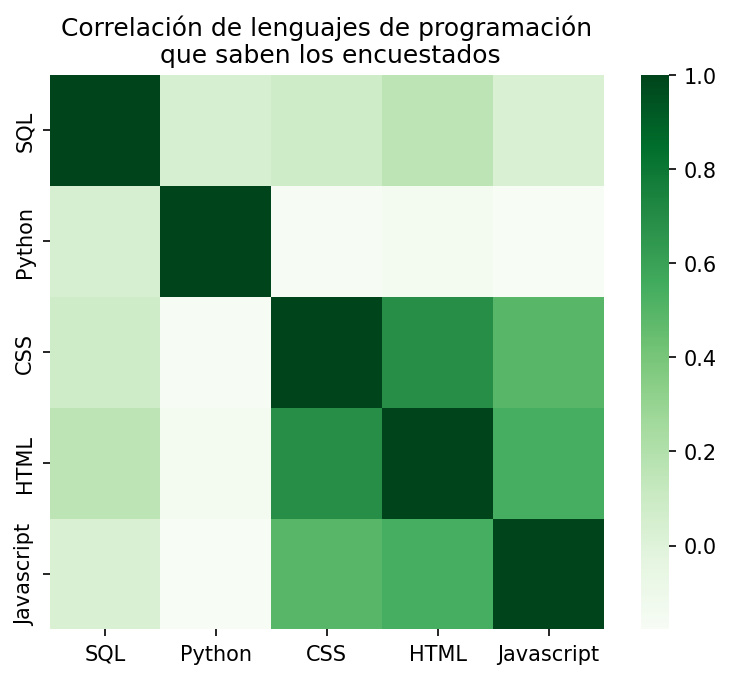

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(dpi=150)
plt.title("Correlación de lenguajes de programación\n que saben los encuestados")
ax = sns.heatmap(data=df_graph, square=True, cmap="Greens")
ax.set_ylabel("")
ax.set_xlabel("")

plt.show()

In [16]:
df_heatmap

,SQL,Python,CSS,HTML,Javascript
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,1
...,...,...,...,...,...
4965,0,0,0,0,0
4966,1,1,1,1,1
4967,1,0,1,1,1
4968,0,0,0,0,0
